<a href="https://colab.research.google.com/github/saheedniyi02/sport_plots_template/blob/main/FPL_predictions_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install highlight-text

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
#from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.pyplot as plt


In [ ]:
font_path = "/content/drive/MyDrive/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [ ]:
unavailable=["Ivan Toney","João Cancelo","Kevin De Bruyne","Reece James"]


In [ ]:
player_images={
                #Forwards
               "Erling Haaland":"737066.png",
               "Harry Kane":"194165.png",
               "Aleksandar Mitrović":"351860.png",
               "Gabriel Fernando de Jesus":"576165.png",
               "Ivan Toney":"408987.png",
               "Dominic Solanke":"591734.png",
               "Ollie Watkins":"540088.png",
               "Callum Wilson":"184321.png",
               "Julián Álvarez":"974753.png",
               "Darwin Núñez Ribeiro":"950561.png",
               "Alexander Isak":"690107.png",
               "Cody Gakpo":"806552.png",
               "Taiwo Awoniyi":"643717.png",
               "Odsonne Edouard":"637746.png",
               "Neal Maupay":"391064.png",
               "Yoane Wissa":"666857.png",
               "Eddie Nketiah":"860920.png",
               "Nicolas Jackson":"1197347.png",
               "Carlton Morris":"562725.png",
               "Matheus Santos Carneiro Da Cunha":"863098.png",
               "Fábio Silva":"1050158.png",
               "Michail Antonio":"158545.png",
                "Jhon Durán":"1088066.png",
                "Bénie Traoré":"1231770.png",
                "Callum Wilson":"184321.png",


               #Midfielders
               "Mohamed Salah":"292462.png",
               "Kevin De Bruyne":"169200.png",
               "Bruno Borges Fernandes":"422685.png",
               "Bukayo Saka":"961995.png",
               "Martin Ødegaard":"534670.png",
               "Gabriel Martinelli Silva":"1021586.png",
               "Solly March":"416850.png",
               "Pascal Groß":"167008.png",
               "Phil Foden":"815006.png",
               "Kaoru Mitoma":"862608.png",
               "Eberechi Eze":"818975.png",
               "Jarrod Bowen":"523825.png",
               "Son Heung-min":"212867.png",
               "Marcus Rashford":"696365.png",
               "Kai Havertz":"749736.png",
               "Jordan Ayew":"154280.png",
               "Declan Rice":"654096.png",
               "Raheem Sterling":"246575.png",
               "Bryan Mbeumo":"923312.png",
               "Moisés Caicedo Corozo":"1137668.png",
               "Carney Chukwuemeka":"1089685.png",
               "Mykhailo Mudryk":"976506.png",
               "Enzo Fernández":"1137705.png",
               "Richarlison de Andrade":"654908.png",
               "Pape Matar Sarr":"1107280.png",
               "Dejan Kulusevski":"935379.png",
               "James Maddison":"493165.png",
               "Bobby De Cordova-Reid":"262550.png",
               "Harry Wilson":"494417.png",
               "Leandro Trossard":"318615.png",
               "Mathias Jensen":"650616.png",
                "Jack Harrison":"751649.png",
                "Hwang Hee-chan":"620026.png",
                "Pedro Lomba Neto":"843040.png",
                "Abdoulaye Doucouré":"352887.png",
                "Alex Iwobi":"604785.png",
                "Jadon Sancho":"846381.png",
                "Alejandro Garnacho":"1203665.png",
                "Morgan Gibbs-White":"789502.png",
                "Mason Mount":"750032.png",
                "Carlos Henrique Casimiro":"208494.png",
                "Antony Matheus dos Santos":"967622.png",
                "Solly March":"416850.png",
                "Julio Enciso":"1073742.png",
                "James Ward-Prowse":"279490.png",
                "Lucas Tolentino Coelho de Lima":"766435.png",
                "Simon Adingra":"1227012.png",
                "Saïd Benrahma":"491883.png",
                "Moussa Diaby":"923498.png",
                "Leon Bailey":"671331.png",
                "John McGinn":"356406.png",
                "Douglas Luiz Soares de Paulo":"787350.png",
                "Mateo Kovačić":"239219.png",
                "Bernardo Veiga de Carvalho e Silva":"488139.png",
                "Jack Grealish":"312765.png",
                "Rodrigo Hernandez":"675088.png",
                "Conor Gallagher":"96027.png",
                "Anthony Gordon":"906937.png",
                "Dominik Szoboszlai":"846005.png",
                "Miguel Almirón Rejala":"442277.png",
                "Harvey Barnes":"760359.png",
                "Luis Díaz":"860914.png",
                "Diogo Teixeira da Silva":"570461.png",


               #Defenders
               "William Saliba":"955406.png",
               "Takehiro Tomiyasu":"664444.png",
               "Kieran Trippier":"191869.png",
               "Rúben Gato Alves Dias":"614006.png",
               "João Cancelo":"361757.png",
               "Joël Veltman":"304455.png",
               "Adam Webster":"303346.png",
               "John Stones":"263653.png",
               "Lewis Dunk":"201690.png",
               "Reece James":"807729.png",
               "Pervis Estupiñán":"688278.png",
               "Manuel Akanji":"521318.png",
               "Andrew Robertson":"357880.png",
               "Ben Chilwell":"672469.png",
               "Axel Disasi":"696646.png",
               "Aaron Wan-Bissaka":"760320.png",
               "Virgil van Dijk":"209405.png",
               "Willy Boly":"246331.png",
               "Luke Shaw":"362694.png",
               "Trent Alexander-Arnold":"760712.png",
               "Raphaël Varane":"230982.png",
               "Benjamin White":"776151.png",
               "Kyle Walker":"159833.png",
               "Lucas Digne":"210111.png",
               "Joško Gvardiol":"1070712.png",
               "Matty Cash":"729731.png",
               "Nathan Aké":"417068.png",
               "Ryan Giles":"933635.png",
               "Malo Gusto":"1197250.png",
               "Levi Colwill":"1096400.png",
               "Thiago Emiliano da Silva":"80562.png",
               "Ben Davies":"276121.png",
               "Emerson Leite de Souza Junior":"797908.png",
               "Destiny Udogie":"9cac7bea.png",
               "Pedro Porro":"941573.png",
               "Cristian Romero":"789066.png",
               "Micky van de Ven":"1097466.png",
               "Ivan Perišić":"163670.png",
               "Gabriel dos Santos Magalhães":"795179.png",
               "Joel Ward":"146830.png",
               "Marc Guéhi":"844425.png",
               "Nathan Collins":"961306.png",
               "Aaron Hickey":"1002039.png",
               "Kristoffer Ajer":"552718.png",
               "Ethan Pinnock":"711357.png",
               "Rico Henry":"562892.png",
                "Nélson Cabral Semedo":"470834.png",
                "Nathan Patterson":"1112684.png",
                "Craig Dawson":"169162.png",
                "Michael Keane":"290410.png",
                "James Tarkowski":"243138.png",
                "Ashley Young":"23354.png",
                "Aaron Wan-Bissaka":"760320.png",
                "Lisandro Martínez":"847983.png",
                "Lewis Dunk":"201690.png",
                "Adam Webster":"303346.png",
                "Lucas Digne":"210111.png",
                "Ezri Konsa Ngoyo":"710159.png",
                "Diego Carlos Santos Silva":"570434.png",
                "Pau Torres":"792645.png",
                "Jordan Beyer":"861447.png",
                "Ameen Al-Dakhil":"1279764.png",
                "Kieran Trippier":"191869.png",



                #Goalkeepers
               "David Raya Martin":"562727.png",
               "Alisson Ramses Becker":"319784.png",
               "Bernd Leno":"215168.png",
               "Nick Pope":"280484.png",
               "Aaron Ramsdale":"746395.png",
               "Vicente Guaita":"109222.png",
               "Ederson Santana de Moraes":"363364.png",
               "Emiliano Martínez Romero":"268375.png",
               "Wes Foderingham":"212944.png",
               "Matt Turner":"729988.png",
               "Mark Flekken":"330643.png",
               "André Onana":"611491.png",
               "Sam Johnstone":"280287.png",
              "James Trafford":"1187213.png",
               "Thomas Kaminski":"131408.png",
               "Robert Sánchez":"789571.png",
               "Norberto Murara Neto":"176186.png",
               "Guglielmo Vicario":"538501.png",
                "Jordan Pickford":"303919.png",
                "José Malheiro de Sá":"416175.png",
                "Jason Steele":"107917.png",
                "Alphonse Areola":"210164.png",

               }

In [ ]:
club_logos={"Man City":"https://images.fotmob.com/image_resources/logo/teamlogo/8456.png",
            "Arsenal":"https://images.fotmob.com/image_resources/logo/teamlogo/9825.png",
            "Brighton":"https://images.fotmob.com/image_resources/logo/teamlogo/10204.png",
            "Brentford":"https://images.fotmob.com/image_resources/logo/teamlogo/9937.png",
            "Aston Villa":"https://images.fotmob.com/image_resources/logo/teamlogo/10252.png",
            "Newcastle":"https://images.fotmob.com/image_resources/logo/teamlogo/10261.png",
            "Bournemouth":"https://images.fotmob.com/image_resources/logo/teamlogo/8678.png",
            "Nott'm Forest":"https://images.fotmob.com/image_resources/logo/teamlogo/10203.png",
            "Wolves":"https://images.fotmob.com/image_resources/logo/teamlogo/8602.png",
            "Spurs":"https://images.fotmob.com/image_resources/logo/teamlogo/8586.png",
            "Chelsea":"https://images.fotmob.com/image_resources/logo/teamlogo/8455.png",
            "Liverpool":"https://images.fotmob.com/image_resources/logo/teamlogo/8650.png",
            "Man Utd":"https://images.fotmob.com/image_resources/logo/teamlogo/10260.png",
            "Crystal Palace":"https://images.fotmob.com/image_resources/logo/teamlogo/9826.png",
            "Luton":"https://images.fotmob.com/image_resources/logo/teamlogo/8346.png",
            "Burnley":"https://images.fotmob.com/image_resources/logo/teamlogo/8191.png",
            "Fulham":"https://images.fotmob.com/image_resources/logo/teamlogo/9879.png",
            "Everton":"https://images.fotmob.com/image_resources/logo/teamlogo/8668.png",
            "West Ham":"https://images.fotmob.com/image_resources/logo/teamlogo/8654.png",
            "Sheffield Utd":"https://images.fotmob.com/image_resources/logo/teamlogo/8657.png"}

In [ ]:
df

,level_0,index,name,team,points,value
0,5,Thomas Kaminski2023-08-25T19:00:00Z,Thomas Kaminski,Luton,5.843449,45
1,4,James Trafford2023-08-27T13:00:00Z,James Trafford,Burnley,4.894679,45
2,3,Ederson Santana de Moraes2023-08-27T13:00:00Z,Ederson Santana de Moraes,Man City,4.551868,55
3,2,Aaron Ramsdale2023-08-26T14:00:00Z,Aaron Ramsdale,Arsenal,4.312822,50
4,1,Jason Steele2023-08-26T16:30:00Z,Jason Steele,Brighton,4.188363,45
5,0,Sam Johnstone2023-08-26T14:00:00Z,Sam Johnstone,Crystal Palace,4.156315,45


In [ ]:
layout = [
          ["logo"]*3+["heading"]*9+["line"]+["subheading"]*7,
          ["logo"]*3+["heading"]*9+["line"]+["subheading"]*7,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,]

## Forwards

In [ ]:
df=pd.read_csv("/content/forwards_points.csv")

df=df[~df["name"].isin(unavailable)]

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

#print(player_club_dict)

In [ ]:
df

,index,name,team,points,value
0,Erling Haaland2023-08-27T13:00:00Z,Erling Haaland,Man City,5.892653,140
1,Yoane Wissa2023-08-26T14:00:00Z,Yoane Wissa,Brentford,4.547223,61
2,Ollie Watkins2023-08-27T13:00:00Z,Ollie Watkins,Aston Villa,4.401439,80
3,Dominic Solanke2023-08-26T11:30:00Z,Dominic Solanke,Bournemouth,4.239560,65
4,Julián Álvarez2023-08-27T13:00:00Z,Julián Álvarez,Man City,4.141160,66
5,Alexander Isak2023-08-27T15:30:00Z,Alexander Isak,Newcastle,4.113417,77
6,Taiwo Awoniyi2023-08-26T14:00:00Z,Taiwo Awoniyi,Nott'm Forest,3.779971,65
7,Eddie Nketiah2023-08-26T14:00:00Z,Eddie Nketiah,Arsenal,3.680726,56
8,Matheus Santos Carneiro Da Cunha2023-08-26T14:...,Matheus Santos Carneiro Da Cunha,Wolves,3.646223,55
9,Callum Wilson2023-08-27T15:30:00Z,Callum Wilson,Newcastle,3.522203,79


In [ ]:
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
df

,level_0,index,name,team,points,value
0,9,Callum Wilson2023-08-27T15:30:00Z,Callum Wilson,Newcastle,3.522203,79
1,8,Matheus Santos Carneiro Da Cunha2023-08-26T14:...,Matheus Santos Carneiro Da Cunha,Wolves,3.646223,55
2,7,Eddie Nketiah2023-08-26T14:00:00Z,Eddie Nketiah,Arsenal,3.680726,56
3,6,Taiwo Awoniyi2023-08-26T14:00:00Z,Taiwo Awoniyi,Nott'm Forest,3.779971,65
4,5,Alexander Isak2023-08-27T15:30:00Z,Alexander Isak,Newcastle,4.113417,77
5,4,Julián Álvarez2023-08-27T13:00:00Z,Julián Álvarez,Man City,4.141160,66
6,3,Dominic Solanke2023-08-26T11:30:00Z,Dominic Solanke,Bournemouth,4.239560,65
7,2,Ollie Watkins2023-08-27T13:00:00Z,Ollie Watkins,Aston Villa,4.401439,80
8,1,Yoane Wissa2023-08-26T14:00:00Z,Yoane Wissa,Brentford,4.547223,61
9,0,Erling Haaland2023-08-27T13:00:00Z,Erling Haaland,Man City,5.892653,140


In [ ]:
gameweek=3

<ipython-input-672-2fbad5866dc4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


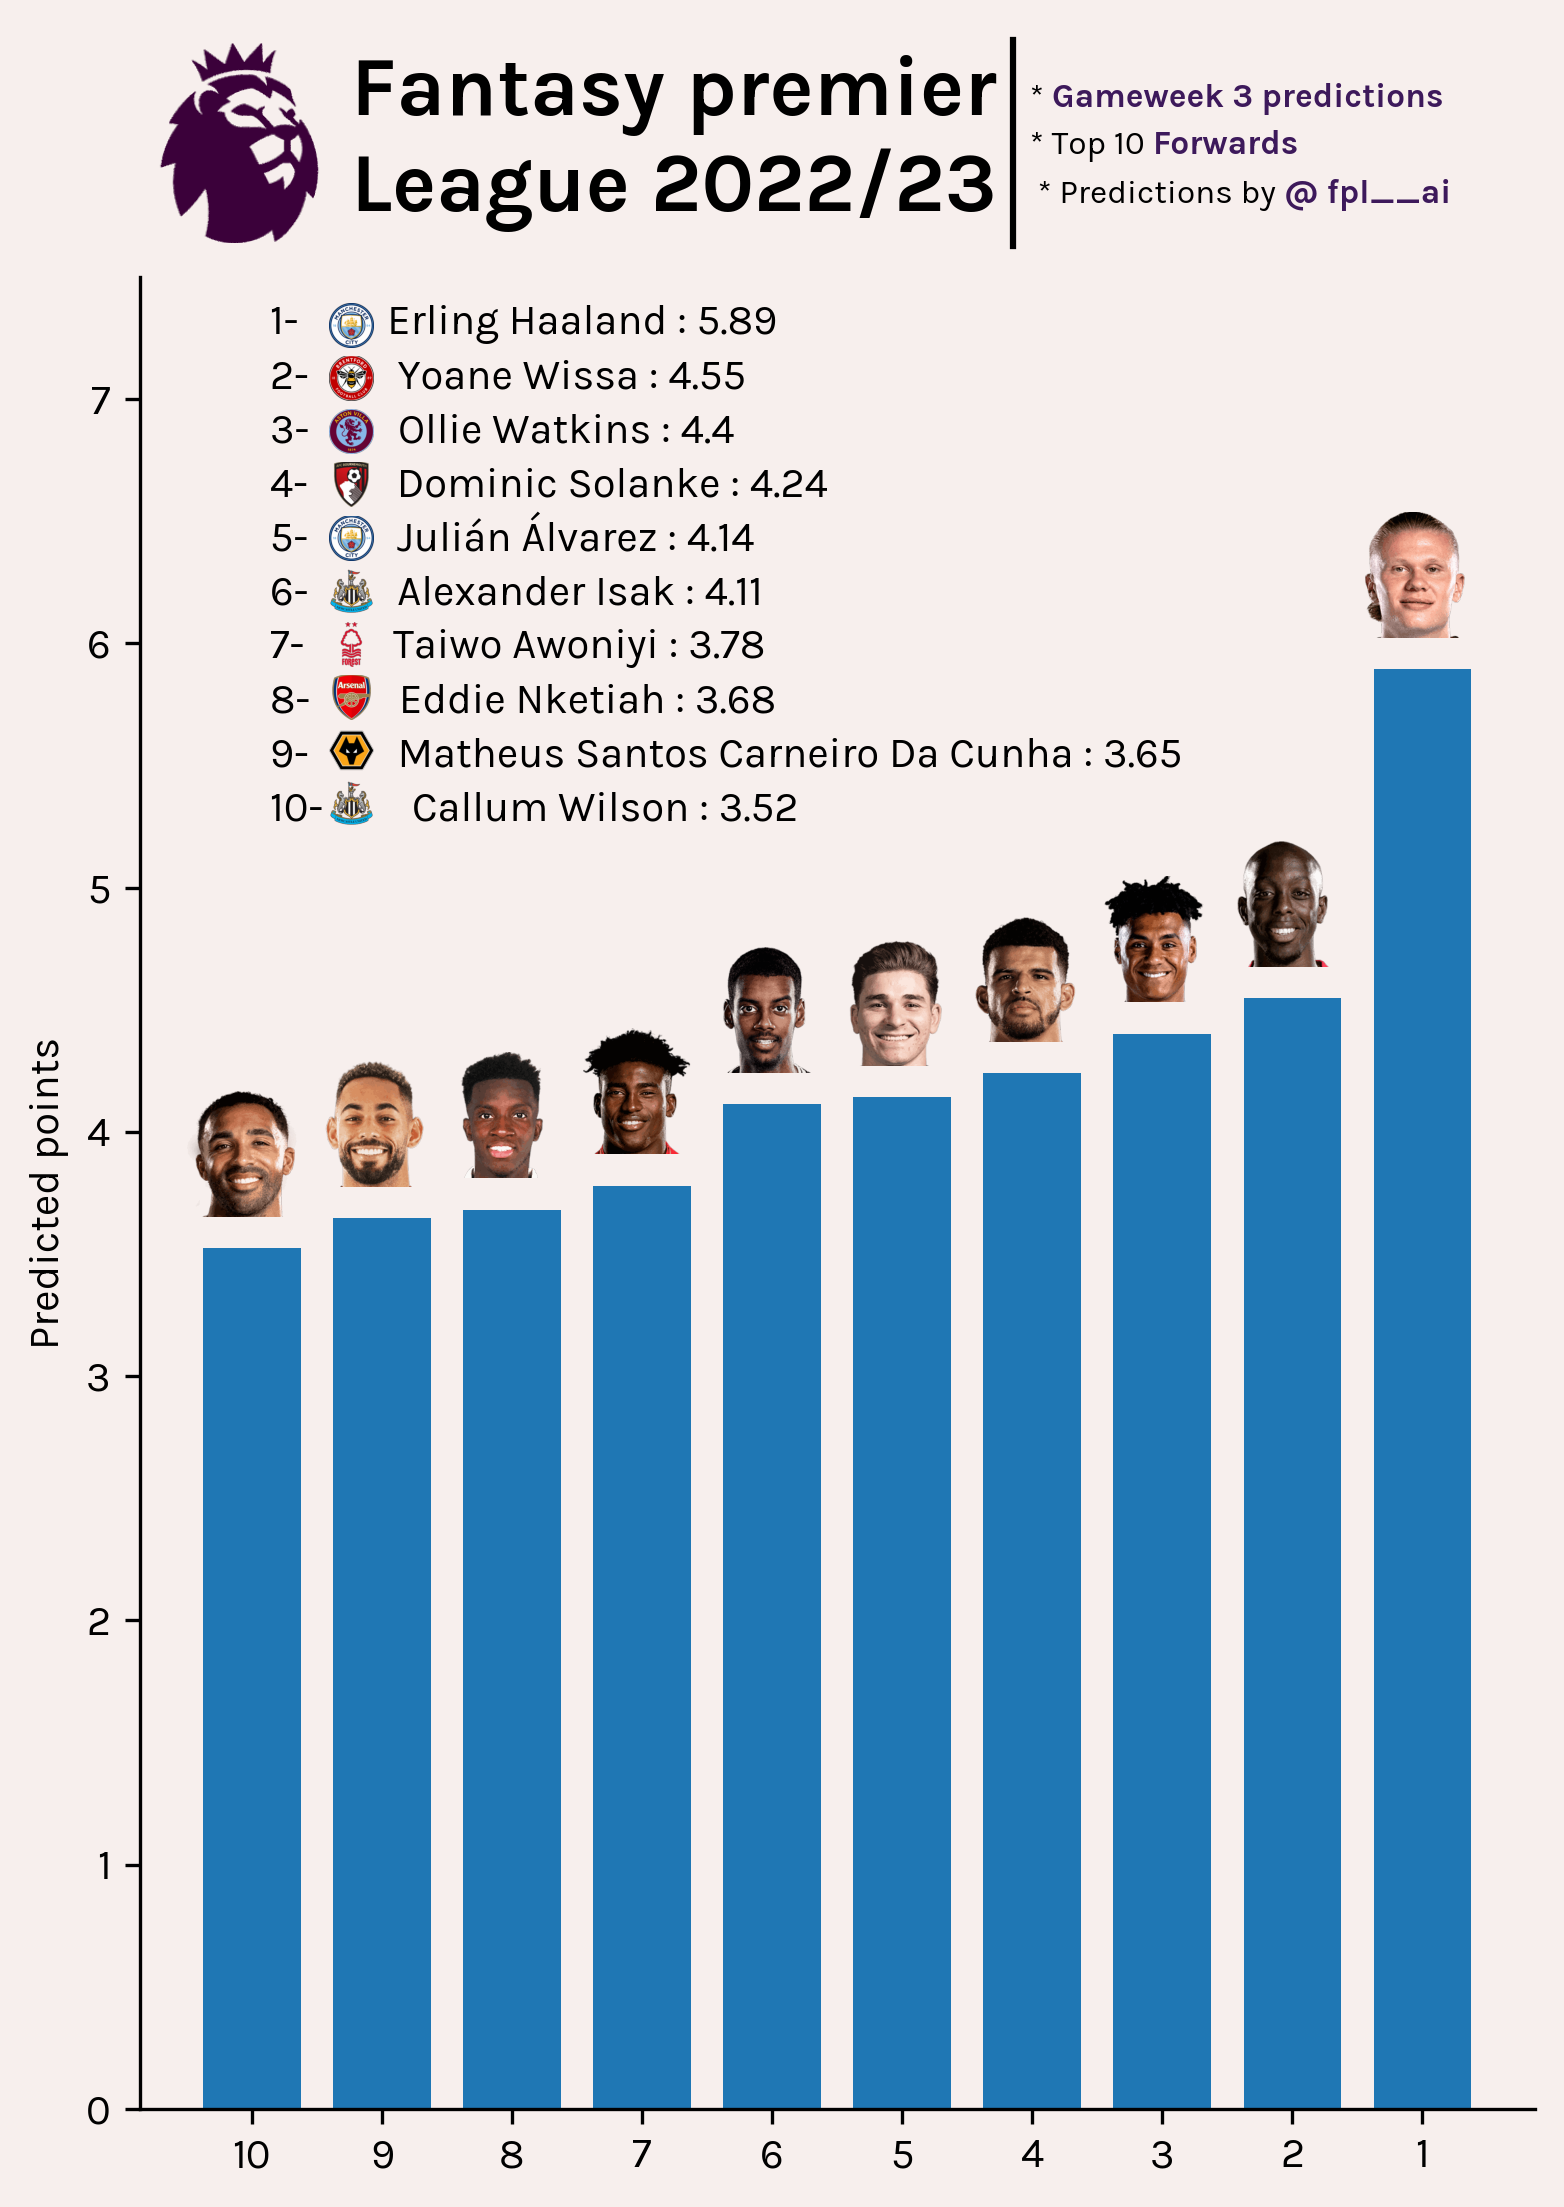

In [ ]:
colors="#fafaf2"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width)
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,7.5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Forwards> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.06,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Midfielders

In [ ]:
df=pd.read_csv("/content/midfielders_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

In [ ]:
df

,level_0,index,name,team,points,value
0,10,Bukayo Saka2023-08-26T14:00:00Z,Bukayo Saka,Arsenal,4.701145,86
1,9,Kaoru Mitoma2023-08-26T16:30:00Z,Kaoru Mitoma,Brighton,4.803999,66
2,8,Son Heung-min2023-08-26T11:30:00Z,Son Heung-min,Spurs,4.860296,90
3,7,Eberechi Eze2023-08-26T14:00:00Z,Eberechi Eze,Crystal Palace,4.865260,64
4,6,Raheem Sterling2023-08-25T19:00:00Z,Raheem Sterling,Chelsea,4.936256,70
5,5,Bryan Mbeumo2023-08-26T14:00:00Z,Bryan Mbeumo,Brentford,4.969154,67
6,4,Solly March2023-08-26T16:30:00Z,Solly March,Brighton,5.025803,66
7,3,Bruno Borges Fernandes2023-08-26T14:00:00Z,Bruno Borges Fernandes,Man Utd,5.592248,85
8,2,Phil Foden2023-08-27T13:00:00Z,Phil Foden,Man City,5.764852,76
9,0,Mohamed Salah2023-08-27T15:30:00Z,Mohamed Salah,Liverpool,8.284966,125


<ipython-input-676-95e393c49921>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


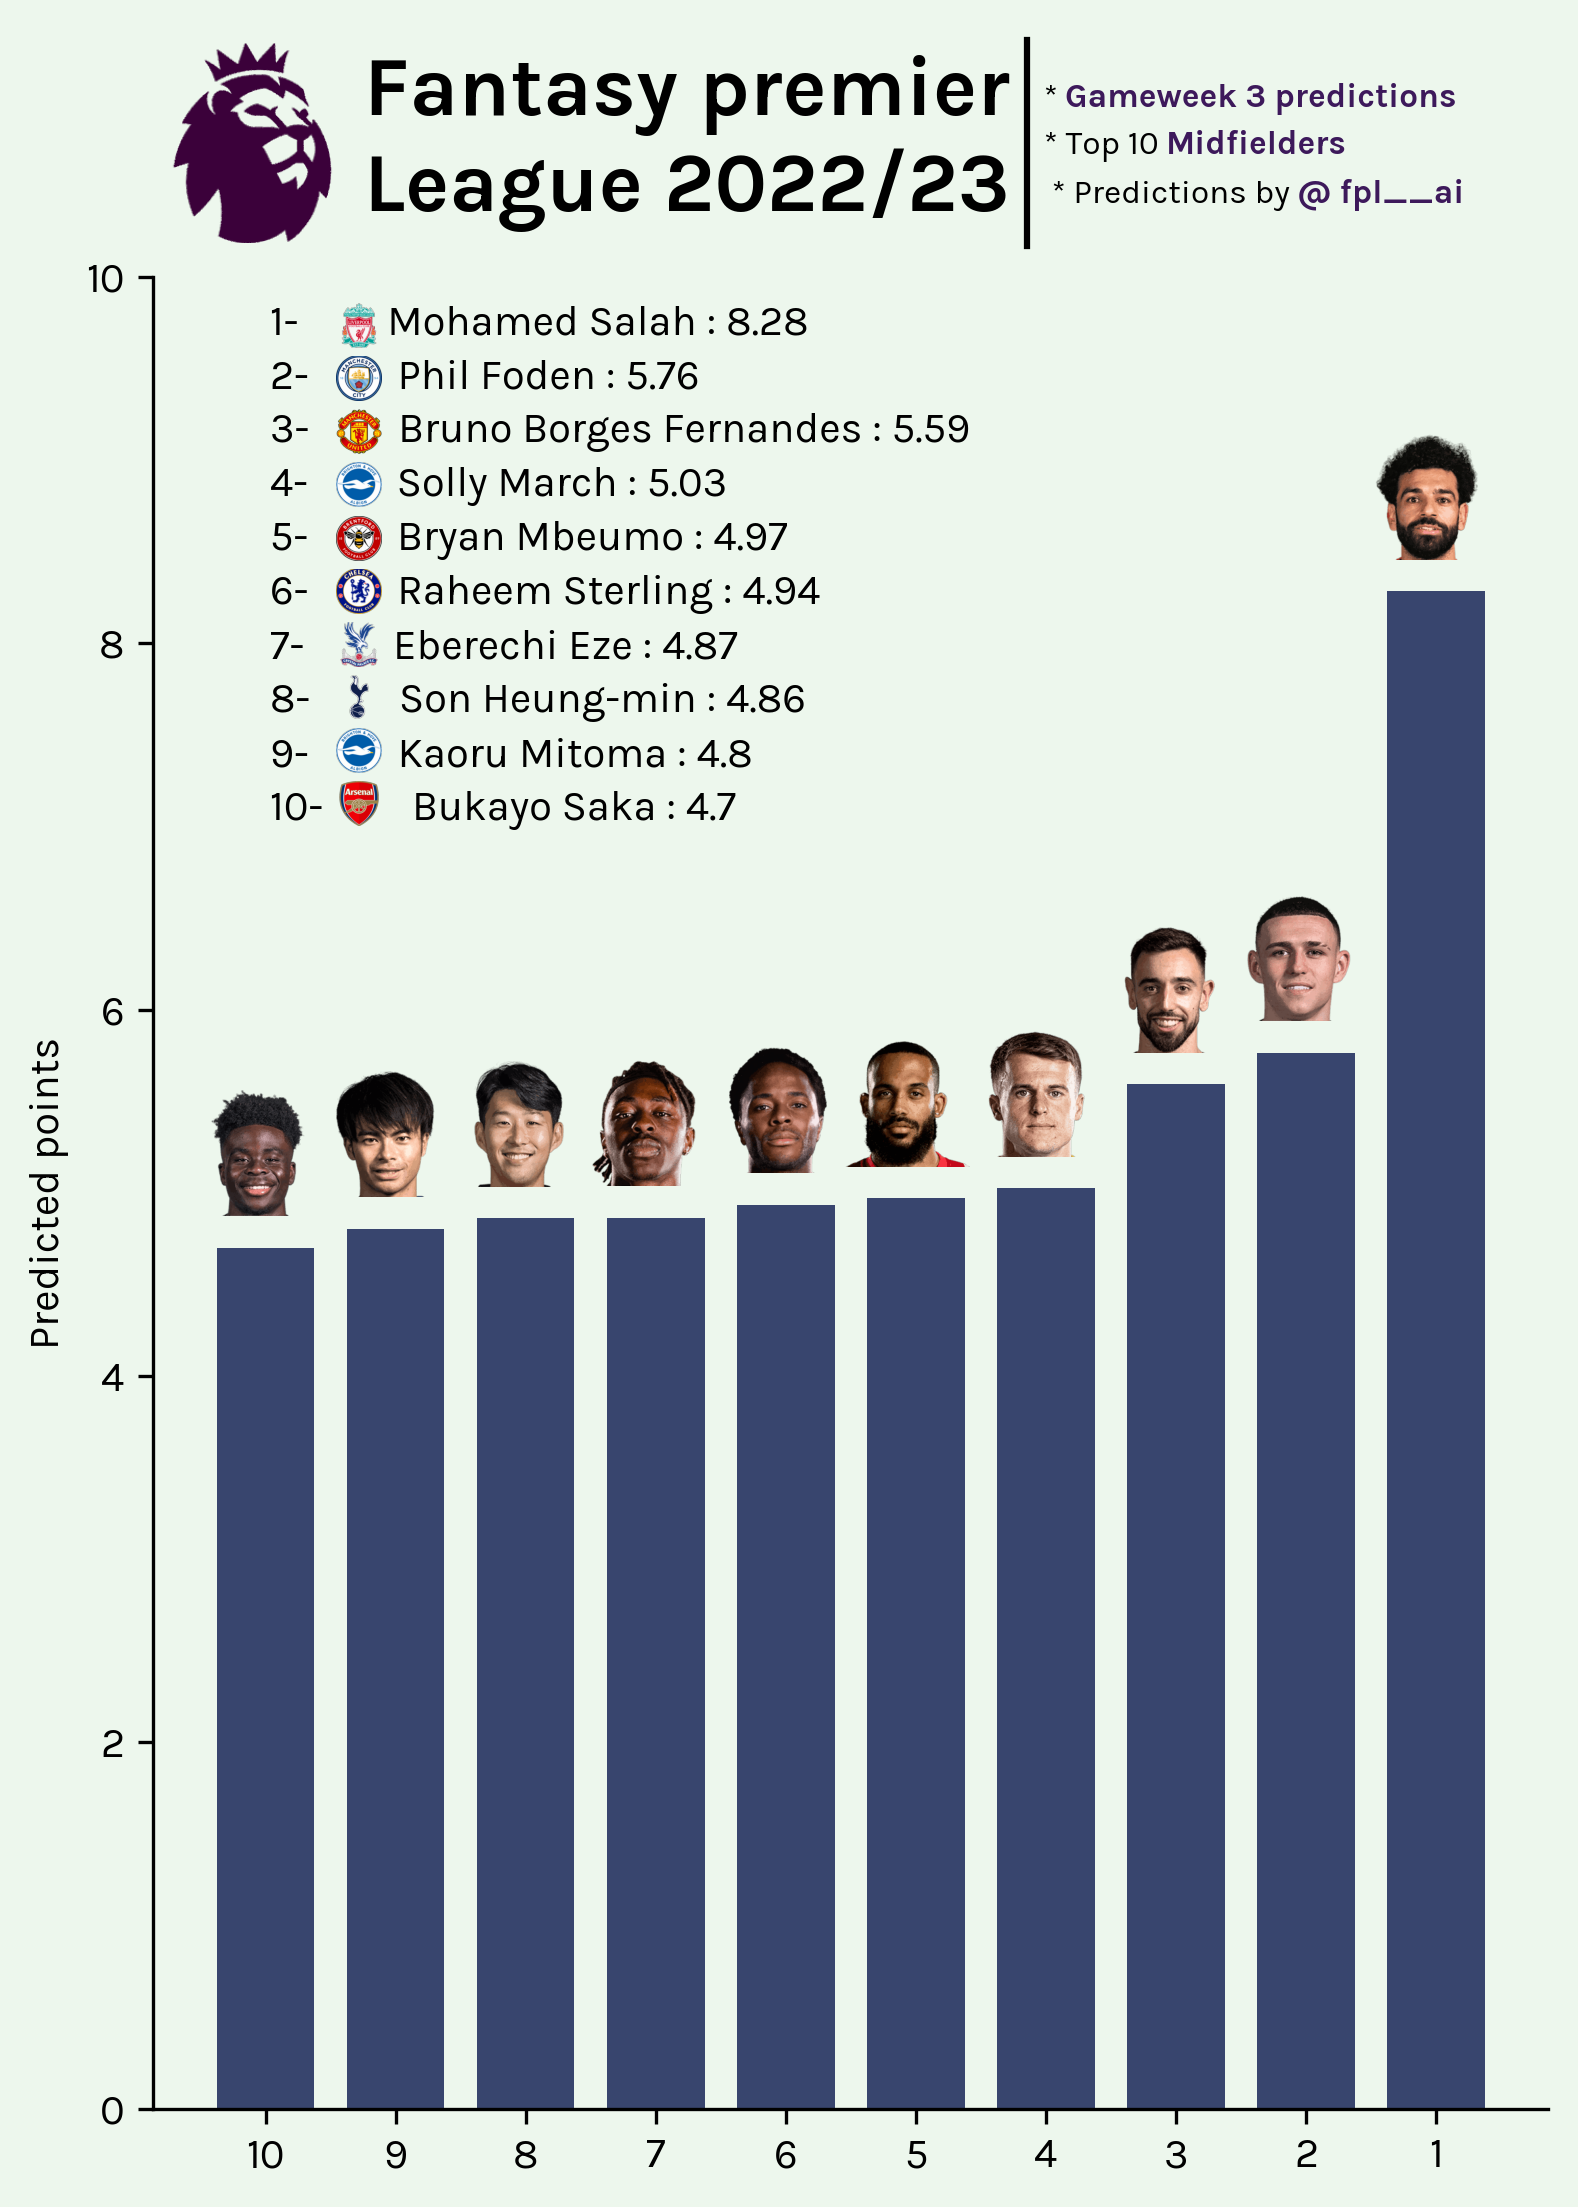

In [ ]:
color="#edf7ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,10)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Midfielders> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.055,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Defenders

In [ ]:
df=pd.read_csv("/content/defenders_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

#prin

In [ ]:
df

,level_0,index,name,team,points,value
0,10,Matty Cash2023-08-27T13:00:00Z,Matty Cash,Aston Villa,3.815831,45
1,9,Joško Gvardiol2023-08-27T13:00:00Z,Joško Gvardiol,Man City,3.939165,50
2,8,Manuel Akanji2023-08-27T13:00:00Z,Manuel Akanji,Man City,3.947901,51
3,7,Nathan Aké2023-08-27T13:00:00Z,Nathan Aké,Man City,3.984416,51
4,6,Lucas Digne2023-08-27T13:00:00Z,Lucas Digne,Aston Villa,4.099221,45
5,5,Luke Shaw2023-08-26T14:00:00Z,Luke Shaw,Man Utd,4.151940,55
6,4,Ben Chilwell2023-08-25T19:00:00Z,Ben Chilwell,Chelsea,4.187931,57
7,3,Kyle Walker2023-08-27T13:00:00Z,Kyle Walker,Man City,4.222290,51
8,1,Trent Alexander-Arnold2023-08-27T15:30:00Z,Trent Alexander-Arnold,Liverpool,4.805496,80
9,0,Pervis Estupiñán2023-08-26T16:30:00Z,Pervis Estupiñán,Brighton,4.977844,52


<ipython-input-684-3e1e6e0e3f04>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


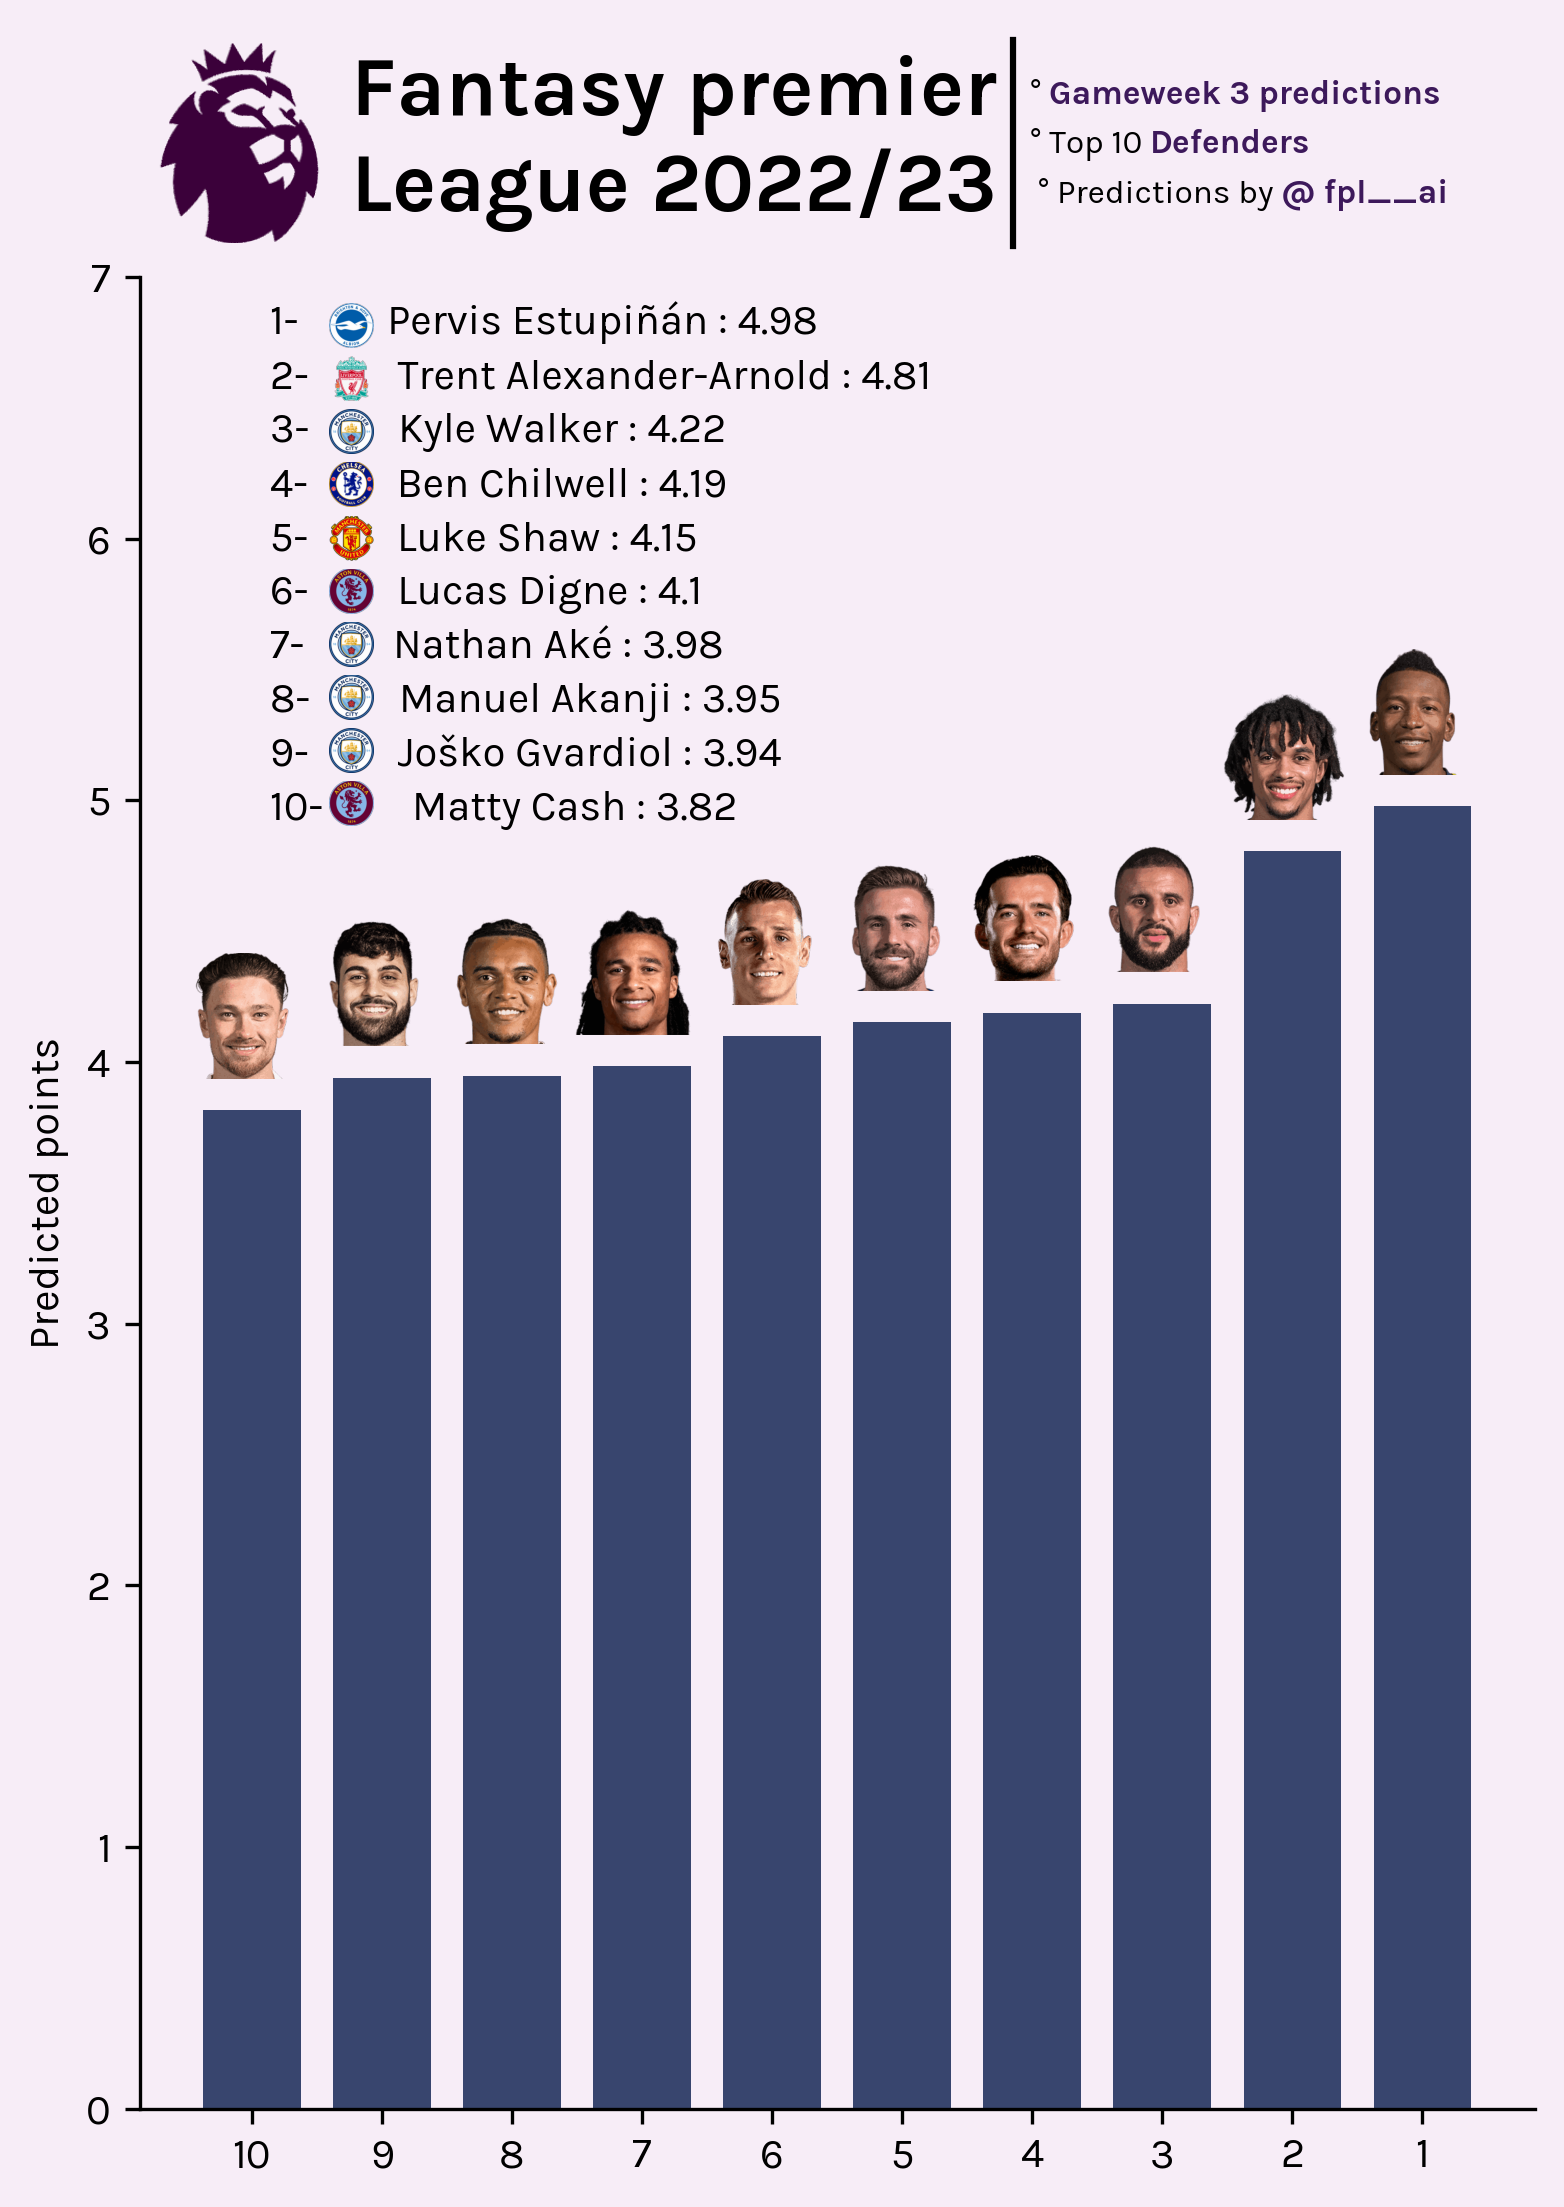

In [ ]:
color="#f7edf7"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,7)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Defenders> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.06,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029

## Goalkeepers

In [ ]:
df=pd.read_csv("/content/goalkeepers_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(6).reset_index()

In [ ]:
player_club_dict = df.set_index('name')['team'].to_dict()

#prin

In [ ]:
df

,level_0,index,name,team,points,value
0,5,Sam Johnstone2023-08-26T14:00:00Z,Sam Johnstone,Crystal Palace,4.156315,45
1,4,Jason Steele2023-08-26T16:30:00Z,Jason Steele,Brighton,4.188363,45
2,3,Aaron Ramsdale2023-08-26T14:00:00Z,Aaron Ramsdale,Arsenal,4.312822,50
3,2,Ederson Santana de Moraes2023-08-27T13:00:00Z,Ederson Santana de Moraes,Man City,4.551868,55
4,1,James Trafford2023-08-27T13:00:00Z,James Trafford,Burnley,4.894679,45
5,0,Thomas Kaminski2023-08-25T19:00:00Z,Thomas Kaminski,Luton,5.843449,45


In [ ]:
df=df.head(6)

<ipython-input-657-28c28661b91b>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(5,-1,-1)])


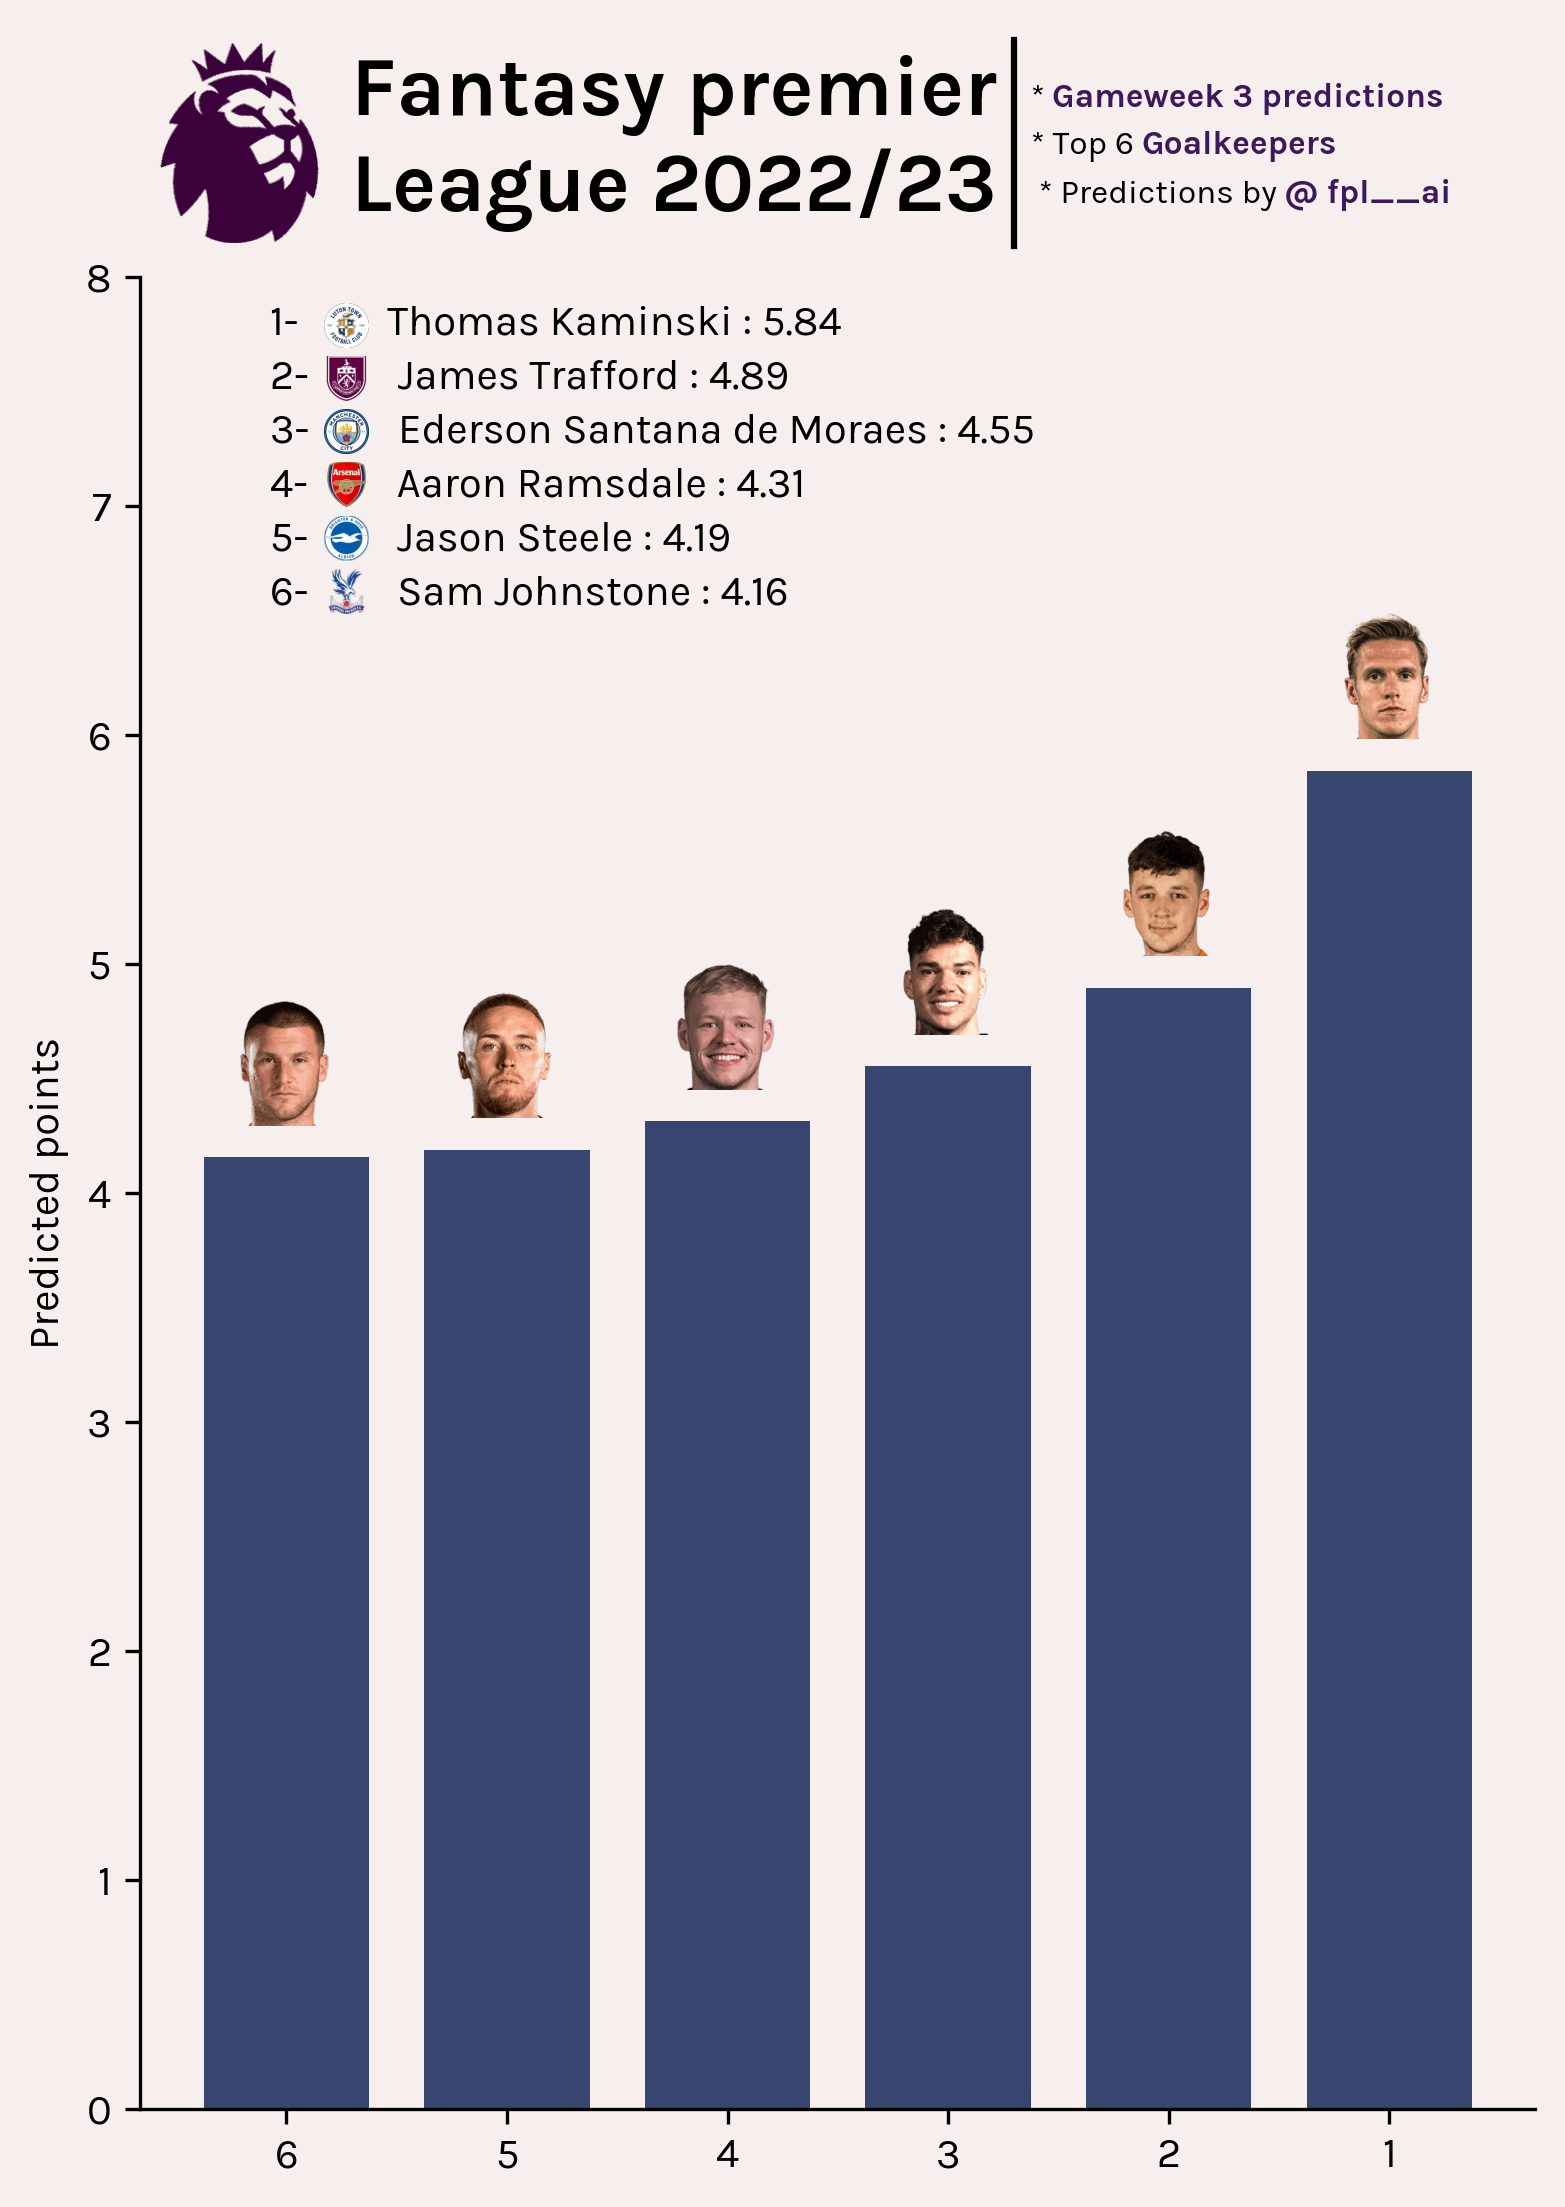

In [ ]:
color="#f7efed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(5,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,8)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/2.5, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 6 <Goalkeepers> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

x,y=0.15,0.69
x_logo,y_logo=0.03,0.955

for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  ax_dict["bar"].annotate(
    xy = (x, y),
    text = f"{i+1}-         {name} : {point}",
    ha = "left",
    va = "bottom",
    #weight = "bold",
    size = 10, color = "black",xycoords="figure fraction")

  #logo_ax = fig.add_axes([0.13, 0.65,0.03,0.03])
  ax_coords = DC_to_NFC([x_logo*ax_dict["bar"].get_xlim()[1],y_logo*ax_dict["bar"].get_ylim()[1]])
  logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.025, 0.025])
  club_url=club_logos[player_club_dict[name]]
  club_icon = Image.open(urllib.request.urlopen(club_url))
  logo_ax.imshow(club_icon)
  logo_ax.axis("off")
  y-=0.02
  y_logo-=0.029